### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#import plotly.express as px

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head() 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [11]:
#Identify columns with null entries
columns_with_null_entries = data.isna().sum()[data.isna().sum()>30]
columns_with_null_entries

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

In [12]:
#Identify duplicate entries
data.duplicated().sum()

74

In [13]:
#age field containing string values
data[['age']].value_counts()

age    
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [14]:
#passenger field having parenthesis
data[['passanger']].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

After investigating data for null entries:
1. Found 6 columns with null entries
2. car column has <1% of data, so it is a good fit to drop the column
3. 5 columns had ~1% of null entries, so we can remove only the row having null entries

After data investigation found 74 duplicate entries, it isn't sure whether the survery collected that information and a human error led to duplication. So, decided to keep that data.

After evaluating the values of age column, replacing string values with numbers i.e. 50plus becomes 51, below21 become 20. Also, convert type from string to int. This will help us query on age easily.

Notice the typo in column name "passanger", it should be "passenger". Also, remove parrenthesis from its values.

In [17]:
# Since there is < 1 % of data for car column, we can drop the column
coupon_df = data.drop(columns='car')

In [18]:
#Remove rows with null entries
coupon_df = coupon_df.dropna()
coupon_df.shape

(12079, 25)

In [19]:
#rename column name
coupon_df.rename(columns={'passanger': 'passenger'}, inplace=True)

In [20]:
#Remove parenthesis
coupon_df['passenger'] = coupon_df['passenger'].str.replace('(','')
coupon_df['passenger'] = coupon_df['passenger'].str.replace(')','')

In [21]:
#Convert age to integer values 
coupon_df['age'] = coupon_df['age'].str.replace('50plus','51')
coupon_df['age'] = coupon_df['age'].str.replace('below21','20')

coupon_df['age'] = coupon_df['age'].astype('int64')

4. What proportion of the total observations chose to accept the coupon? 



In [23]:
#Total data count
total_acceptance_percentage = round((coupon_df.query('Y ==1').shape[0]/coupon_df.shape[0])*100)
total_acceptance_percentage

57

57% of coupons were accepted.

5. Use a bar plot to visualize the `coupon` column.

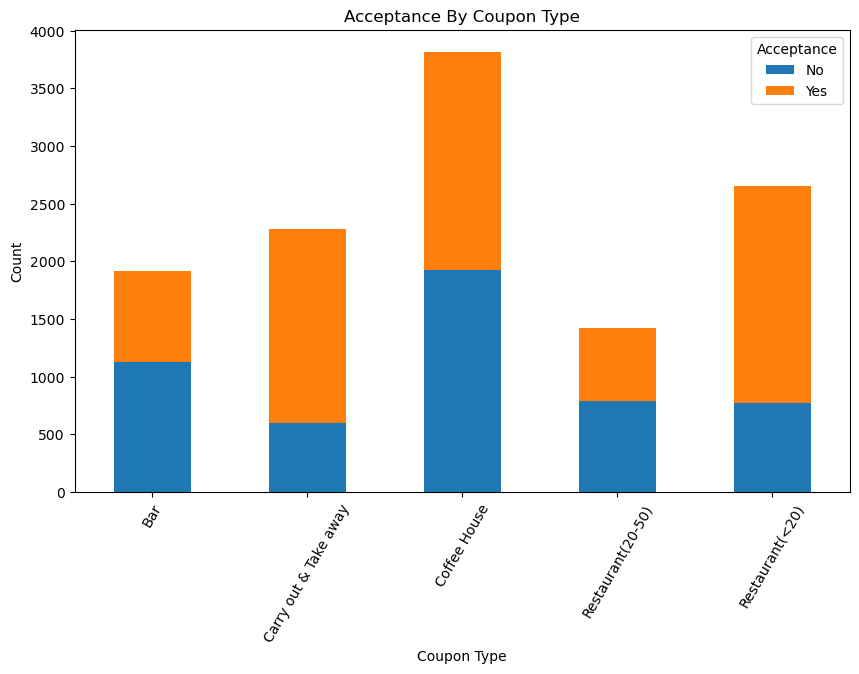

In [26]:
#Group by coupon acceptance
group_by_coupon_acceptance = coupon_df.groupby(['coupon', 'Y']).size().unstack()

group_by_coupon_acceptance.plot(kind='bar', stacked=True,  figsize=(10, 6))
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.title("Acceptance By Coupon Type")
plt.legend(title='Acceptance', labels=['No', 'Yes'])
plt.show()

6. Use a histogram to visualize the temperature column.

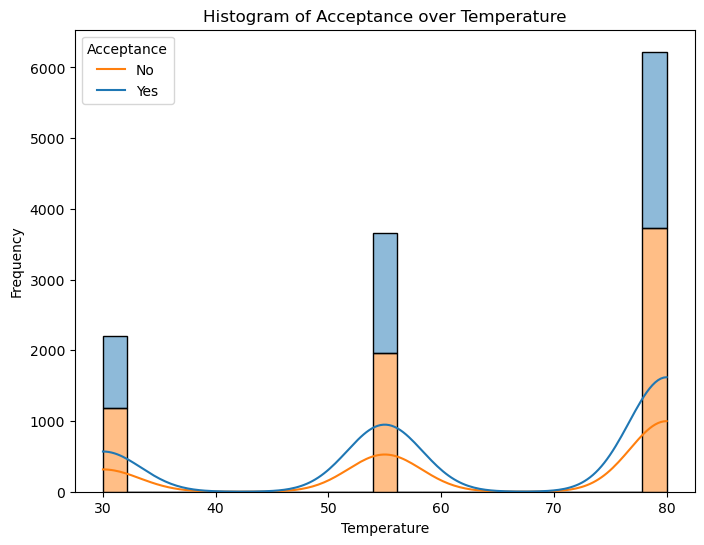

In [102]:
#Histogram of coupon acceptance over temperature
plt.figure(figsize=(8, 6))
sns.histplot(data=coupon_df, x ='temperature', kde=True, hue='Y', multiple="stack")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of Acceptance over Temperature")
plt.legend(title='Acceptance', labels=['No', 'Yes'])
plt.show()



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
#Query coupon_df for Bar
bar_df = coupon_df.query('coupon == "Bar"')
bar_df.shape

(1913, 25)

2. What proportion of bar coupons were accepted?


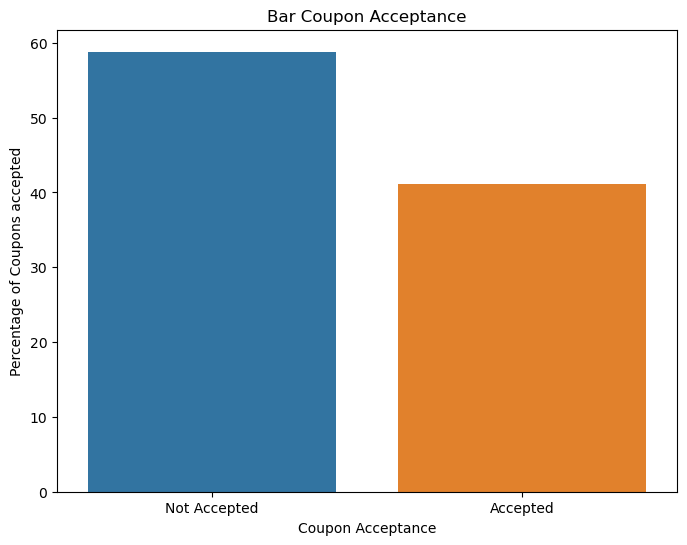

41.19 % of Bar Coupons got accepted.


In [32]:
#Group bar_df by coupon acceptance
total_bar_count= bar_df.shape[0]
bar_acceptance_df = ((bar_df.groupby('Y')[["Bar"]].count()/total_bar_count)*100).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data= bar_acceptance_df, x='Y', y='Bar')
plt.title('Bar Coupon Acceptance')
plt.xlabel("Coupon Acceptance")
plt.ylabel("Percentage of Coupons accepted")
plt.xticks([1,0], ['Accepted', 'Not Accepted'])
plt.show()
print(f"{round(bar_acceptance_df.query('Y ==1')['Bar'].sum(),2)} % of Bar Coupons got accepted.")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


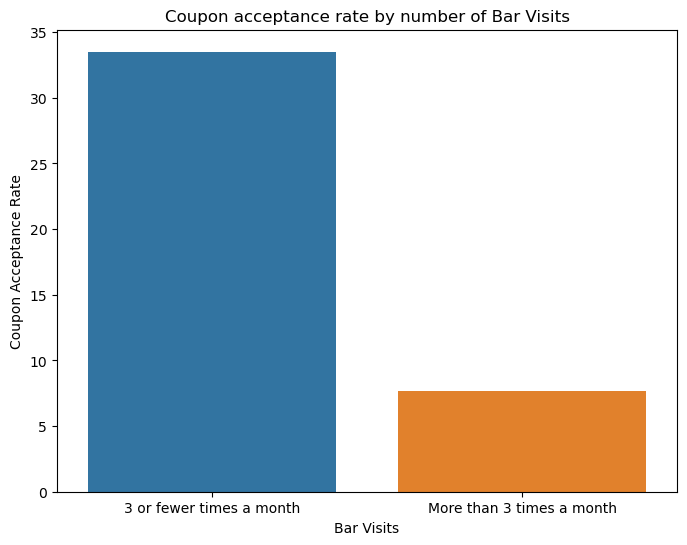

In [34]:
#Query DF with condition and calculate count
less_than_3 = ["never","less1","1~3"]
bar_lt3_count = bar_df.query('Y==1 and Bar in @less_than_3')["Bar"].count()
bar_gt3_count = bar_df.query('Y==1 and Bar not in @less_than_3')["Bar"].count()

#Create DF
bar_3_dict = {"Bar Visits":["3 or fewer times a month","More than 3 times a month"],
              "Coupon Acceptance Rate":[bar_lt3_count, bar_gt3_count]}
bar_3_acc_df = pd.DataFrame(data=bar_3_dict)

#Calculate acceptance rate
bar_3_acc_df['Coupon Acceptance Rate']= round((bar_3_acc_df['Coupon Acceptance Rate']/ total_bar_count)*100, 2)

#Plot graph for comparison
plt.figure(figsize=(8, 6))
sns.barplot(data= bar_3_acc_df, x ='Bar Visits', y='Coupon Acceptance Rate')
plt.title("Coupon acceptance rate by number of Bar Visits")

plt.show()


Drivers who visited Bar less than 3 times are more likely, 33.51%, to accept Bar coupon than who visited more than 3 times, 7.68%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


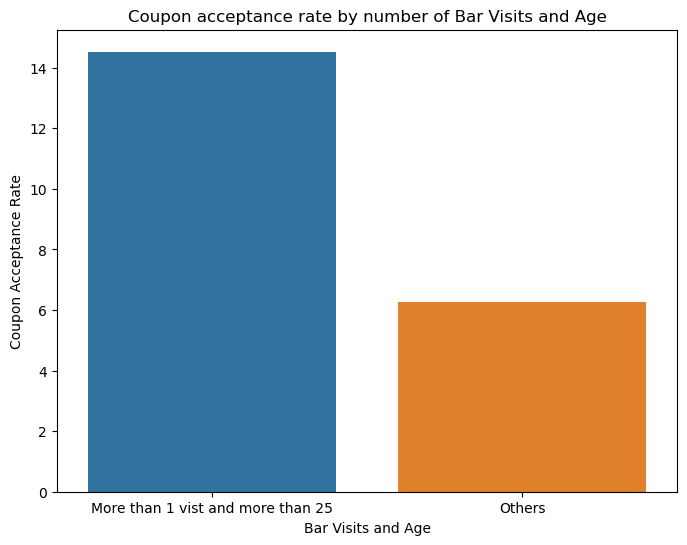

Coupon acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is 14.53% and all others is 6.27%. 


In [37]:
more_than_1 = ["1~3","4~8","gt8"]

#Query bar_df to filter by conditions and get count 
bar_morethan_1_age_25= bar_df.query('Bar in @more_than_1 and Y == 1 and age > 25')["Bar"].count()
bar_others= bar_df.query('Bar not in @more_than_1 and Y == 1 and age <= 25')["Bar"].count()

#Calculating acceptance percent
bar_others_acceptance = round((bar_others/ total_bar_count)*100, 2)
bar_morethan_1_age_25_acceptance = round((bar_morethan_1_age_25/ total_bar_count)*100, 2)

#Build Dataframe
bar_mt1_dict = {"Bar Visits and Age":['More than 1 vist and more than 25', 'Others'],
                "Coupon Acceptance Rate" :[bar_morethan_1_age_25_acceptance, bar_others_acceptance]}
bar_mt1_Df = pd.DataFrame(data=bar_mt1_dict)

#Plot Graph
plt.figure(figsize=(8, 6))
sns.barplot(data=bar_mt1_Df, x ='Bar Visits and Age', y='Coupon Acceptance Rate')
plt.title("Coupon acceptance rate by number of Bar Visits and Age")
plt.show()

print(f"Coupon acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is {bar_morethan_1_age_25_acceptance}% and all others is {bar_others_acceptance}%. ")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


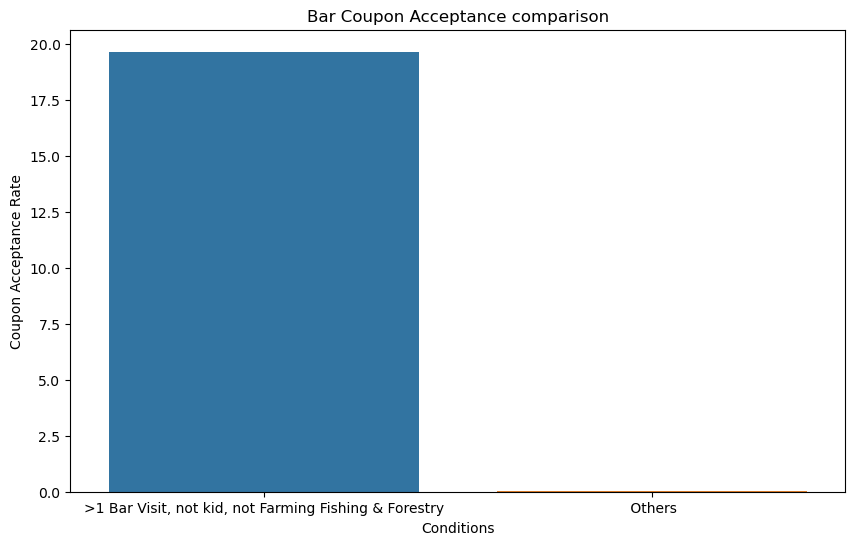

Coupon acceptance rate of drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 19.65% and all others is 0.05%.


In [39]:
occupations ='Farming Fishing & Forestry'
kids = 'Kids'

#Query bar_df to filter by conditions and get count 
bar_occ_kids= bar_df.query('Bar in @more_than_1 and Y == 1 and passenger != @kids and occupation != @occupations ')["Bar"].count()
bar_occ_kids_others = bar_df.query('Bar not in @more_than_1 and Y == 1 and passenger == @kids and occupation == @occupations ')["Bar"].count()

#Calculate acceptance percentage
bar_occ_kids_accp = round((bar_occ_kids/ total_bar_count)*100, 2)
bar_occ_kids_others_accp = round((bar_occ_kids_others/ total_bar_count)*100, 2)

#Build DF
dict_5 = {"Conditions":[">1 Bar Visit, not kid, not Farming Fishing & Forestry"," Others"],
            "Coupon Acceptance Rate":[bar_occ_kids_accp,bar_occ_kids_others_accp]}
df_dict_5 = pd.DataFrame(data = dict_5)

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_dict_5, x ="Conditions", y="Coupon Acceptance Rate")
plt.title("Bar Coupon Acceptance comparison")
plt.show()


print(f"Coupon acceptance rate of drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is {bar_occ_kids_accp}% and all others is {bar_occ_kids_others_accp}%.")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



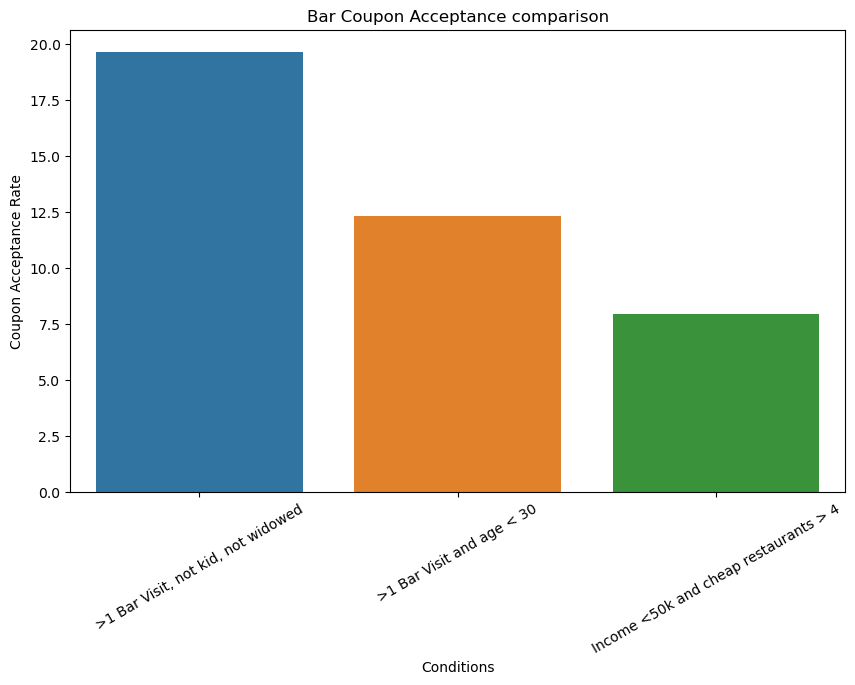

In [41]:
restaurants= ['4~8','gt8']
incomes= ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

#Query bar_df to filter by conditions and get count
bar_pass_wid = bar_df.query('Bar in @more_than_1 and Y == 1 and passenger != @kids and maritalStatus != "Widowed"')["Bar"].count()
bar_30 = bar_df.query('Bar in @more_than_1 and Y == 1 and age < 30')["Bar"].count()
inc_res = bar_df.query(' Y ==1 and income in @incomes and RestaurantLessThan20 in @restaurants')["income"].count()

#Build DF
dict_6 = {"Conditions":[">1 Bar Visit, not kid, not widowed",">1 Bar Visit and age < 30","Income <50k and cheap restaurants > 4"],
            "Coupon Acceptance Rate":[bar_pass_wid, bar_30, inc_res]}
df_dict_6 = pd.DataFrame(data = dict_6)

#Calculate acceptance percentage
df_dict_6["Coupon Acceptance Rate"] = round((df_dict_6["Coupon Acceptance Rate"]/ total_bar_count)*100, 2)

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_dict_6, x ="Conditions", y="Coupon Acceptance Rate")
plt.title("Bar Coupon Acceptance comparison")
plt.xticks(rotation=30)
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Observations:
1. Drivers who visited bar less than 3 times a month i.e. Casual/Social drinkers are more likely to accept bar coupons and use it.
2. Drivers with kids don't visit bars i.e. Socially Responsible and Adhering to the law
3. Drivers under 25 and who visited bar once a month i.e. Occasional drinkers also have good likelihood of accepting bar coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. DataFrame this contains just Coffe House coupons

In [46]:
coffee_df=coupon_df.query('coupon == "Coffee House"')
total_coffee_count = coffee_df.shape[0]

2. Compare the acceptance rates between those drivers who:
    - go with passengers that are Alone and Friends, visited coffee less than 3
    - go with passengers that are Alone and Friends, visited coffee more than 3
    - go with passengers that are Partner and Kids, visited coffee less than 3
    - go with passengers that are Partner and Kids, visited coffee more than 3

In [48]:
chlist=['never','less1','1~3']
paslist= ['Alone','Friends']

#Query to apply the filter conditions and return count
cf_lt3_frndz_count = coffee_df.query('Y == 1 and CoffeeHouse in @chlist and passenger in @paslist') ['CoffeeHouse'].count()
cf_gt3_frndz_count = coffee_df.query('Y == 1 and CoffeeHouse not in @chlist and passenger in @paslist') ['CoffeeHouse'].count()
cf_lt3_family_count = coffee_df.query('Y == 1 and CoffeeHouse in @chlist and passenger not in @paslist') ['CoffeeHouse'].count()
cf_gt3_family_count = coffee_df.query('Y == 1 and CoffeeHouse not in @chlist and passenger not in @paslist') ['CoffeeHouse'].count()

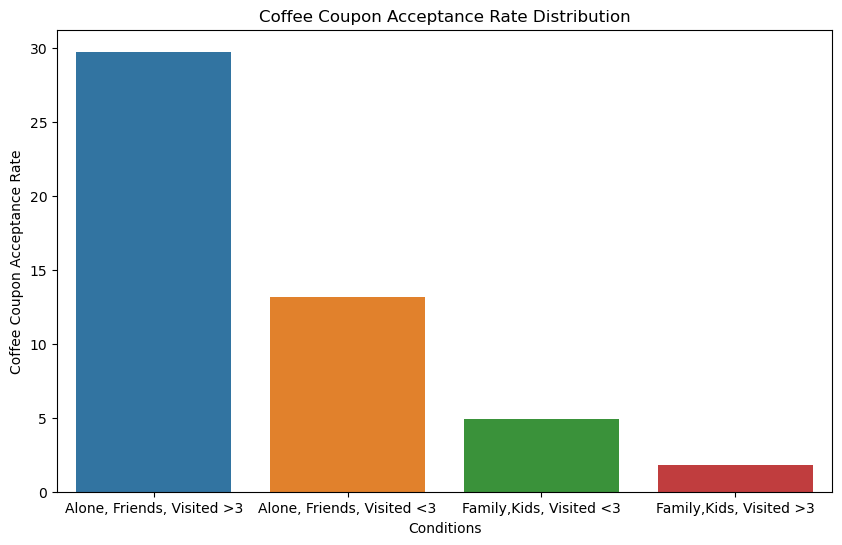

In [49]:

#Construct dataframe
cf_dist= {"Conditions":["Alone, Friends, Visited >3","Alone, Friends, Visited <3", "Family,Kids, Visited <3","Family,Kids, Visited >3"],
         "Coffee Coupon Acceptance Rate":[cf_lt3_frndz_count,cf_gt3_frndz_count,cf_lt3_family_count,cf_gt3_family_count]}
cf_df = pd.DataFrame(data=cf_dist)

#Calculate acceptance rate
cf_df['Coffee Coupon Acceptance Rate']= round((cf_df['Coffee Coupon Acceptance Rate']/total_coffee_count)*100,2)

#Plot graph
plt.figure(figsize=(10, 6))
sns.barplot(data=cf_df, x='Conditions', y='Coffee Coupon Acceptance Rate')
plt.title("Coffee Coupon Acceptance Rate Distribution")
#plt.xticks(rotation=30)
plt.show()

### Observations:

1. People who visited coffee house more than 3 times a month when travel by themselves or with friends are more likely to accept coffe house coupons. The probability of they coffee house accepting coupon is doubled when compared with people who visits coffee house less than 3 times a month
2. People who travel with kids are less likely to accept coffe house coupons, probability further reduces if they vist coffee house less than 3 times a month

Another visualization, heatmap, of number of coupons acceptance distributed over Gender, Marital Status

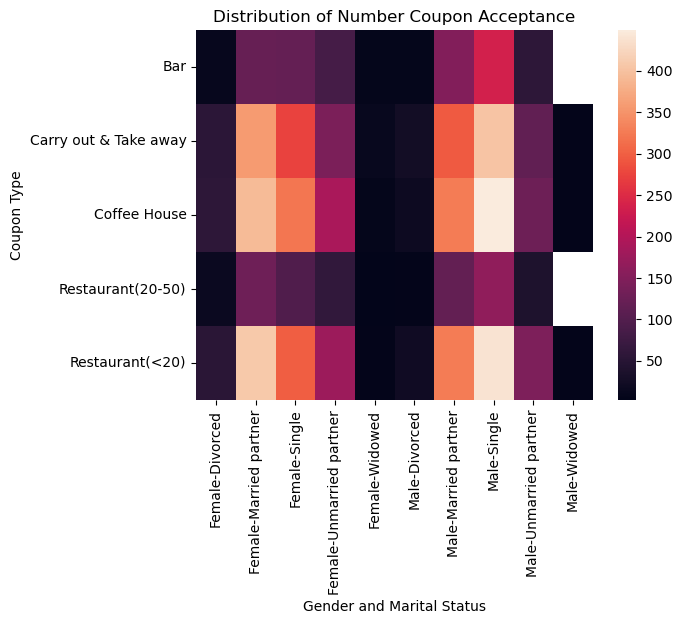

In [51]:
# Distribution of passangers who accepted coupon, by gender, maritalStatus 
sns.heatmap(coupon_df.query('Y == 1').groupby(['coupon','gender','maritalStatus'])[['passenger']]
            .count().reset_index().pivot(index="coupon", columns=["gender","maritalStatus"], values='passenger'))
plt.xlabel("Gender and Marital Status")
plt.ylabel("Coupon Type")
plt.title("Distribution of Number Coupon Acceptance")
plt.show()

### Observations
1. Based on above heatmap :
   - Single Male tend to accept more coupons
   - Less likelihood of Female Widowed/Divor